In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
# Load the MNIST Dataset
# The dataset consists of 70,000 images of handwritten digits (0-9) and their labels.
mnist = fetch_openml('mnist_784', version=1)
print(mnist.feature_names)
print(mnist.target_names)
print(mnist.data.shape)
print(mnist.target.shape)

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [4]:
# Convert to DataFrame for convenience
df = pd.DataFrame(mnist.data, columns=mnist.feature_names)

In [5]:
# Export the iris dataset as an excel chart
df.iloc[0:1000].to_excel('mnist_v1.xlsx', index=True)

In [6]:
# Assigning the Features & Target Vectors
X, y = mnist['data'], mnist['target']
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [7]:
# Convert target labels to integers for classification
y = y.astype(np.int64) # Updated from np.int to np.int32 or, int64
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64


In [8]:
# Split the Data into Training and Test Sets
# Using 80% of data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the KNN Classifier with k=3
# The choice of k can significantly impact the model's performance
knn = KNeighborsClassifier(n_neighbors=3)

In [10]:
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Make Predictions on the Test Data
y_pred = knn.predict(X_test)

In [12]:
# Evaluate the Model Performance
# Confusion Matrix: shows the number of correct and incorrect prediction
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1335    0    5    0    0    0    1    1    1    0]
 [   0 1591    3    0    1    1    0    3    0    1]
 [   8   14 1333    1    1    1    4   13    3    2]
 [   0    3   12 1382    0   10    2   10    7    7]
 [   3    9    1    0 1248    0    2    4    1   27]
 [   4    5    0   13    4 1234   12    0    1    0]
 [   5    1    0    0    4    3 1383    0    0    0]
 [   1   17    4    0    2    0    0 1467    1   11]
 [   6   13    8   21    4   16    3    6 1269   11]
 [   6    6    3   14   20    0    0   14    1 1356]]


In [13]:
# Classification Report: provides precision, recall, f1-score for each class
class_report = classification_report(y_test, y_pred)
# accuracy_score has been overwritten with a float. Use the correct function name from sklearn.metrics
#from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print("\nClassification Report:\n", class_report)
print(f"\n ACCURACY SCORE = {acc_score*100:.2f}%")


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


 ACCURACY SCORE = 97.13%


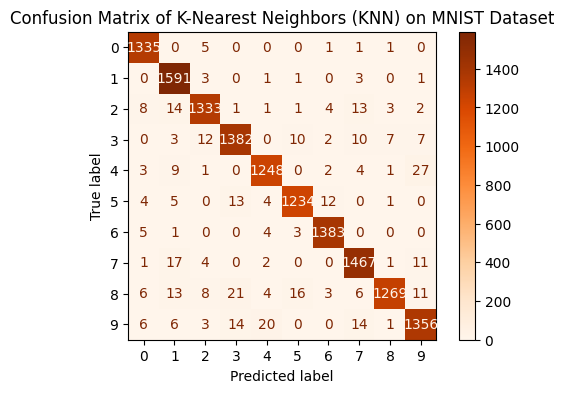

In [15]:
# Plot the confusion matrix
# Set figure size
#plt.subplots() creates a full grid of subplots and returns them in one call, making it easier to manage multiple axes at once.
fig, ax = plt.subplots(figsize=(6, 4))
# Plot confusion matrix
# mnist.target_names may not be accessible in this scope
# Define the labels explicitly
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Oranges', ax=ax)
plt.title("Confusion Matrix of K-Nearest Neighbors (KNN) on MNIST Dataset")
plt.show()

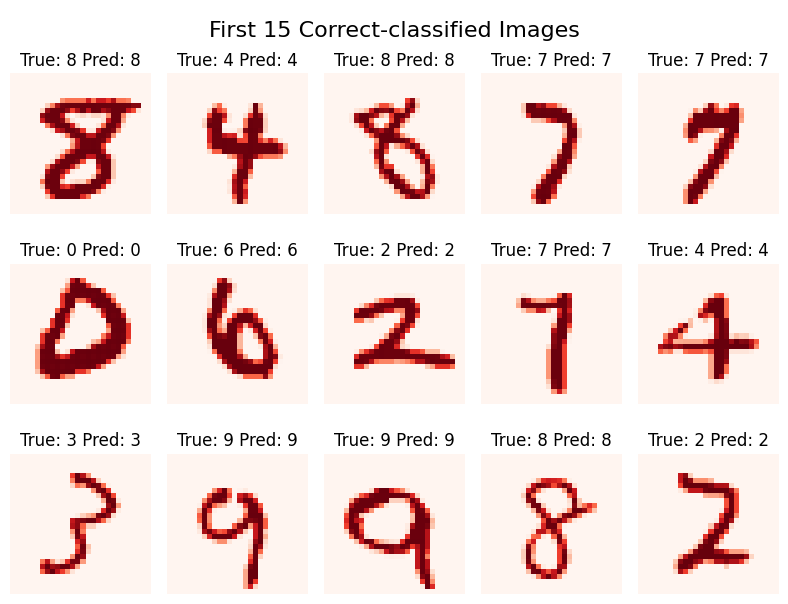

In [16]:
# Visualizing Some Test Images and Predictions
# This helps us qualitatively assess how well the model performs
plt.figure(figsize=(8, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1) #plt.subplot() creates a single subplot at a specified position in a grid and is called individually for ea
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='Reds')
    plt.title(f'\n\nTrue: {y_test.iloc[i]} Pred: {y_pred[i]}')
    plt.axis('off')
plt.tight_layout()
plt.suptitle('First 15 Correct-classified Images', fontsize=16)
plt.show()

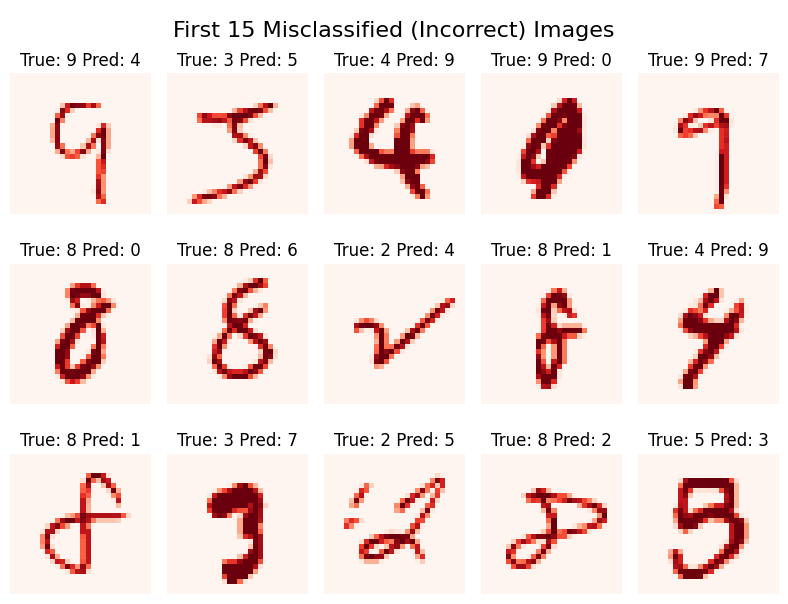

In [17]:
# Additional Analysis: Plotting the First 15 Misclassified (Incorrect) Images
misclassified_indices = np.where(y_pred != y_test)[0][:15] # Get indices of misclassified samples
plt.figure(figsize=(8, 6))
for i, index in enumerate(misclassified_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test.iloc[index].values.reshape(28, 28), cmap='Reds')
    plt.title(f'\n\nTrue: {y_test.iloc[index]} Pred: {y_pred[index]}')
    plt.axis('off')
plt.tight_layout()
plt.suptitle('First 15 Misclassified (Incorrect) Images', fontsize=16)
plt.show()